# <font color=darkcyan> Multivariate linear regression - Lasso </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors 
from sklearn.metrics import mean_squared_error


It is assumed that for all $1\leqslant i \leqslant n$, 

$$
Y_i = X^\top_i \beta_{\star} + \varepsilon_i\,,
$$

where the $(\varepsilon_i)_{1\leqslant i\leqslant n}$ are i.i.d. random variables in $\mathbb{R}$, $X_i\in\mathbb{R}^d$ and $\beta_{\star}$ is an unknown vector in $\mathbb{R}^d$. Let $Y\in\mathbb{R}^n$ (resp. $\varepsilon\in\mathbb{R}^n$)  be the random vector such that  for all $1\leqslant i \leqslant n$, the $i$-th component of $Y$ (resp. $\varepsilon$) is $Y_i$ (resp. $\varepsilon_i$) and $X\in\mathbb{R}^{n\times d}$ the matrix with line $i$ equal to $X^\top_i$. The model is then written

$$
Y = X \beta_{\star} + \varepsilon\,.
$$

In this section, it is assumed that $\mathbb{E}[\varepsilon] = 0$ and $\mathbb{E}[\varepsilon \varepsilon^\top] = \sigma_{\star}^2 I_n$. The Lasso estimate of $\beta_{\star}$ is defined as a solution to

$$
\widehat \beta_n\in  \mathrm{argmin}_{\beta\in\mathbb{R}^d}\,\left( n^{-1}\|Y - X\beta\|_2^2 + \lambda \|\beta\|_1\right)\,,
$$

where $\lambda>0$.

<font color=darkred> Explain the coordinate-wise optimization procedure </font>

#### Import data

In [2]:
import pandas as pd

Data frames can be imported using pandas. This provides two-dimensional and heterogeneous tabular data.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

<font color=darkred>
Import data in the file BRinf using ``read_csv``, display the first rows with ``head`` and the shape of the dataframe using ``shape``.
</font>

In [3]:
# In this section, multivariate linear regression is used to predic the Brazilian inflation based on
# many observed variables, see https://github.com/gabrielrvsc/HDeconometrics/
df = pd.read_csv('BRinf.csv')
df.head()

,Unnamed: 0,Brazil CPI IPCA MoM,FGV Brazil General Prices IGP-,FGV Brazil General Prices IGP-.1,FGV Brazil General Prices IGP-.2,FGV Brazil General Prices IGP-.3,Brazil CPI IPCA Median Market,Brazil Total Electricity Consu,Brazil Industrial Electricity,BofA Merrill Lynch Economic Co,...,X5t.12,X5t.13,fmed2,fmean,fmean2,fdp,lfmed2,lfmean,lfmean2,lfdp
0,2003-01-31,2.25,2.33,2.17,5.816,2.29,11.56,25422.0,-359,-1.47,...,0.80,0.68,4.0000,1.96,3.8416,0.18,1.3225,1.15,1.3225,0.24
1,2003-02-28,1.57,2.28,1.59,4.351,2.42,10.95,25163.0,-303,-1.21,...,0.68,0.48,2.5600,1.60,2.5600,0.26,0.7569,0.91,0.8281,0.27
2,2003-03-31,1.23,1.53,1.66,4.593,1.58,9.58,24960.0,115,-0.35,...,0.55,0.50,0.8836,0.93,0.8649,0.13,0.4900,0.73,0.5329,0.17
3,2003-04-30,0.97,0.92,0.41,1.173,1.24,8.88,25284.0,93,-0.15,...,0.45,0.78,1.0000,0.97,0.9409,0.14,0.2500,0.52,0.2704,0.18
4,2003-05-31,0.61,-0.26,-0.67,-1.860,0.02,8.22,24785.0,285,-0.47,...,0.60,0.43,0.2500,0.50,0.2500,0.10,0.3025,0.55,0.3025,0.15


In [4]:
# number of observations, number of variables
df.shape
#enlever variable date
df = df.iloc[: , 1:]

<font color=darkred>
Use the ``StandardScaler`` of sklearn to preprocess the input variables.
</font>

``StandardScaler`` standardizes the input variables by removing the mean and scaling to unit variance.
We will not analyze closely standardization in this course. However, it is often very useful (even mandatory in some cases) for the stability of learning procedures.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


(156, 92)

<font color=darkred>
Build two datasets. 
    ``X_train`` and ``Y_train`` contain the first 140 input data and observations. ``X_test`` and ``Y_test`` contain the remaining input data and observations. We train a linear regression model using ``X_train`` and ``Y_train`` and we assess the performance of the model using ``X_test`` and ``Y_test``. 
</font>

https://pandas.pydata.org/docs/reference/frame.html

In [18]:
nombre_train =  140


sc = scaler.fit(df.iloc[:nombre_train, 1:])
X = sc.transform(df.iloc[:, 1:])
X = pd.DataFrame(X)

X_train, Y_train = X.iloc[:nombre_train, 1:], X.iloc[:nombre_train, 0]
X_test, Y_test = X.iloc[nombre_train:, 1:], X.iloc[nombre_train:, 0]

print(f"Y_train = {Y_train.shape}, \n Y_test = {Y_test.shape}, \n X_train = {X_train.shape}, \n X_test = {X_test.shape}")

# Convert DataFrame to NumPy arrays
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

Y_train = (140,), 
 Y_test = (16,), 
 X_train = (140, 90), 
 X_test = (16, 90)


#### Lasso Regression from scractch

<font color=darkred>
Write a ``threshold_function`` function with arguments a real number ``z`` and a positive number ``$\alpha$`` which returns 
$$
\begin{cases}
z+\alpha & \text{if } z<-\alpha, \\
z-\alpha & \text{if } z>\alpha, \\
0 & \text{otherwise}. \\
\end{cases}
$$
</font>

In [7]:
def threshold_function(z, alpha):
    if z < -alpha:
        return (z + alpha)
    elif z > alpha:
        return (z - alpha)
    else:
        return 0


<font color=darkred>
    Write a coordinate_descent_lasso function with arguments an initial estimate $\beta$, the data X and y, a penalty parameter $\alpha$ and a number of iterations n_iter. The function returns the parameter estimate after n_iter iterations of the coordinate-wise optimization procedure.


    
</font>

To make things simpler, you can write the function with $\alpha = \lambda n /2$ in the mathematical derivation above.

In [39]:
def coordinate_descent_lasso_random(beta, X, y, lambda_truc , n_iter, liste_iter):
    n, d = X.shape
    liste_beta = []
    n_iter = int(n_iter) #CORRECTION : on calcule la norme au carré de chaque colonne de X

    for _ in range(n_iter + 1):
        # Choisir aléatoirement une coordonnée j dans {0, ..., d-1}
        j = np.random.randint(d)
        
        #Calcul B_j
        X_j = X[:, j]
        residual = y - X.dot(beta) + beta[j] * X_j
        v_j = (X_j @ residual)

        # Mettre à jour beta[j]

        #CORRECTION~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

        beta[j] = threshold_function(v_j, lambda_truc/2) / n #CORRECTION / on diviste par la norme au carré de la colonne j
        
    
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


        #Enregistrer les valeurs de beta pour certaines itérations
        if _ in liste_iter:
            liste_beta.append(beta.copy())

 
    return np.array(liste_beta)


<font color=darkred>
    Run the algorithm with several values of $\alpha$ using X_train and Y_train and display the number of zero coeficients of the parameter estimate and the MSE obtained on the test set.
    </font>

In [9]:
liste_lambdas =  [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0]
liste_iter = np.arange(500, 10101, 200)
n_iter = liste_iter[-1]


In [44]:
#MES RESULTATS

results = []

#Pour les graphiques de fin
my_liste_beta = []
my_liste_num_zero_coefs =[]
my_liste_mse = []
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

for lambda_truc in liste_lambdas :
        beta_initial = np.random.randn(X_train.shape[1])

        #Pour les graphiques de fin
        liste_beta_hat = coordinate_descent_lasso_random(beta_initial, X_train, Y_train, lambda_truc, n_iter, liste_iter)
        my_liste_beta.append(liste_beta_hat[-1])
        my_liste_num_zero_coefs.append(np.sum(liste_beta_hat[-1] == 0))
        my_liste_mse.append(mean_squared_error(Y_test, X_test @ liste_beta_hat[-1]))
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~	

        # Récupérer les résultats pour chaque itération
        for beta_hat, n_iter in zip(liste_beta_hat, liste_iter):
            num_zero_coefs = np.sum(beta_hat == 0) # Nombre de zéro coefficients
            beta_hat_norm = np.linalg.norm(beta_hat) # Norme de béta_hat
            Y_pred = X_test @ beta_hat # Prédiction sur le test set
            mse = mean_squared_error(Y_test, Y_pred) 
            results.append((lambda_truc, n_iter, num_zero_coefs, mse, beta_hat_norm))

results = np.array(results)



In [41]:
for lambda_truc in liste_lambdas :

    print(f"\n~~~~~~~~~~~~~~~~~~~~\nPour lambda = {lambda_truc} \n")
    results_lambda = [result for result in results if result[0] == lambda_truc]

    for lambda_truc, n_iter, num_zero_coefs, mse, beta_hat_norm in results_lambda:
        print(f"Avec {n_iter} itérations, il y a {num_zero_coefs} coeff de béta mis à 0, et le MSE= {mse}")
        print(f"Norme de béta_hat = {beta_hat_norm} \n")


~~~~~~~~~~~~~~~~~~~~
Pour lambda = 0.001 

Avec 500.0 itérations, il y a 0.0 coeff de béta mis à 0, et le MSE= 3.9516890765954913
Norme de béta_hat = 7.518824175576388 

Avec 700.0 itérations, il y a 0.0 coeff de béta mis à 0, et le MSE= 3.6836628211895306
Norme de béta_hat = 7.17648421426731 

Avec 900.0 itérations, il y a 0.0 coeff de béta mis à 0, et le MSE= 3.7259597624486007
Norme de béta_hat = 7.058014998796458 

Avec 1100.0 itérations, il y a 0.0 coeff de béta mis à 0, et le MSE= 4.364796547487135
Norme de béta_hat = 6.8953587823992715 

Avec 1300.0 itérations, il y a 0.0 coeff de béta mis à 0, et le MSE= 3.86592077280895
Norme de béta_hat = 6.796700597453962 

Avec 1500.0 itérations, il y a 0.0 coeff de béta mis à 0, et le MSE= 3.5916642726133468
Norme de béta_hat = 6.674236874593801 

Avec 1700.0 itérations, il y a 0.0 coeff de béta mis à 0, et le MSE= 3.7620197273335094
Norme de béta_hat = 6.595107547498905 

Avec 1900.0 itérations, il y a 0.0 coeff de béta mis à 0, et le MS

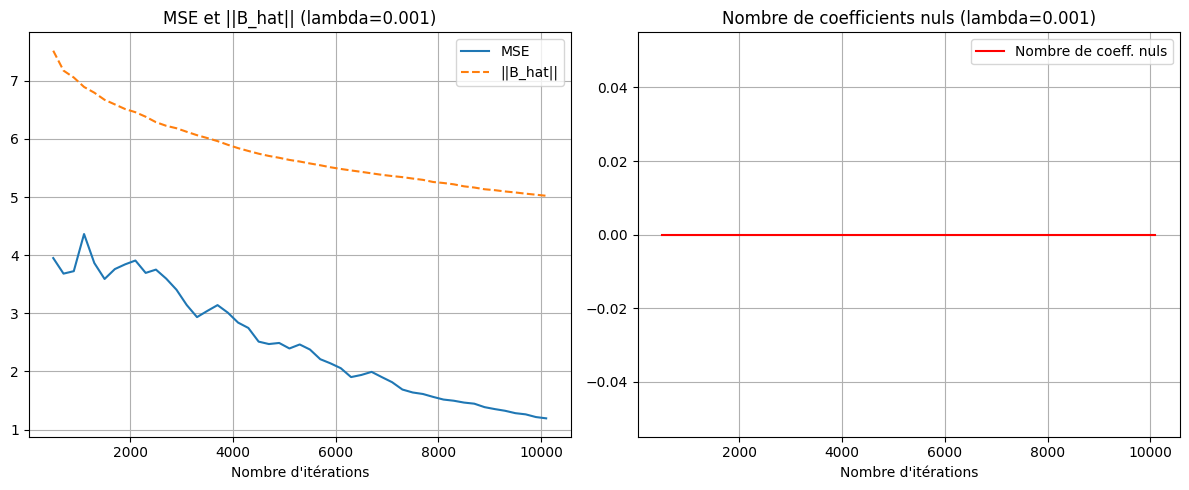

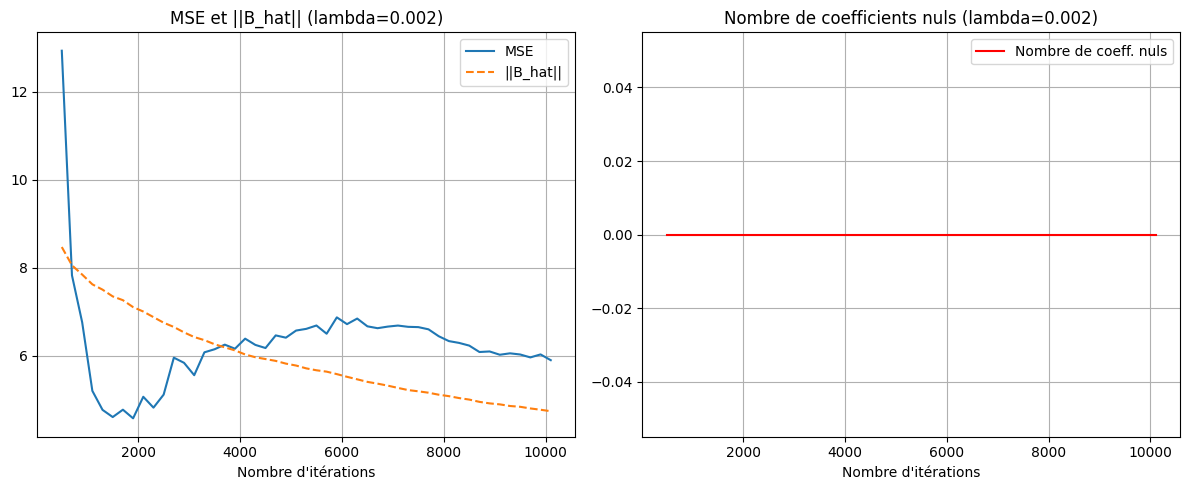

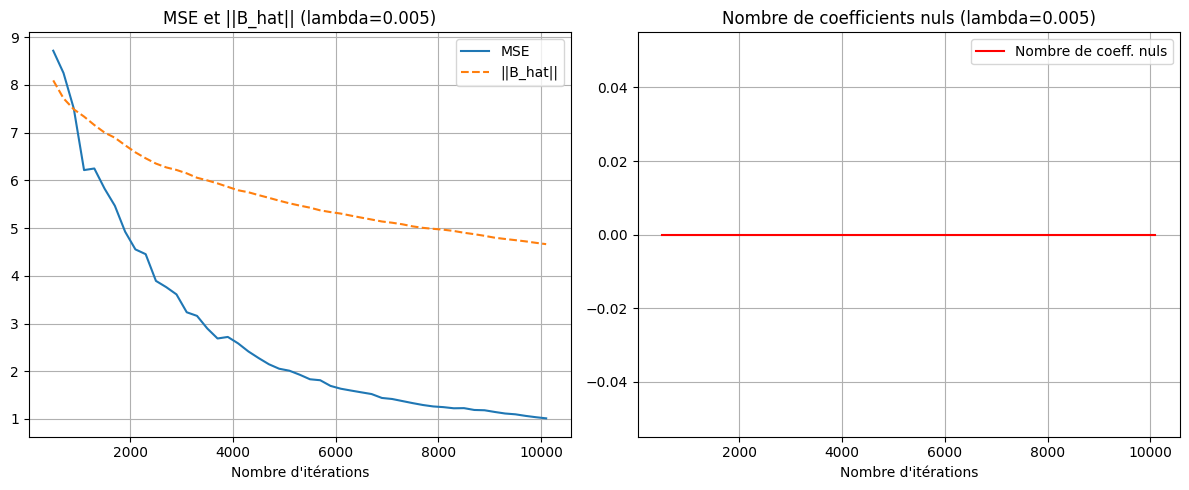

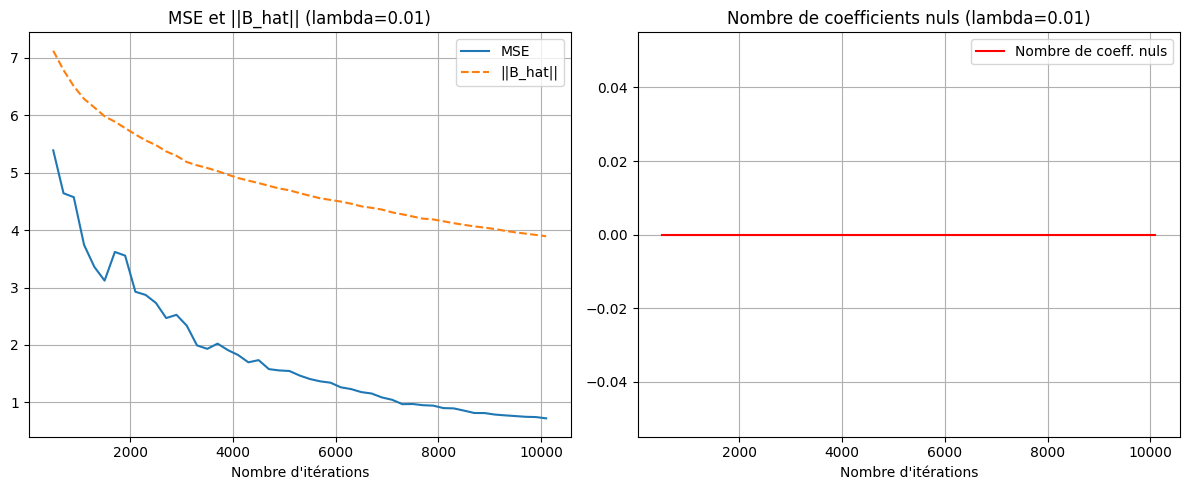

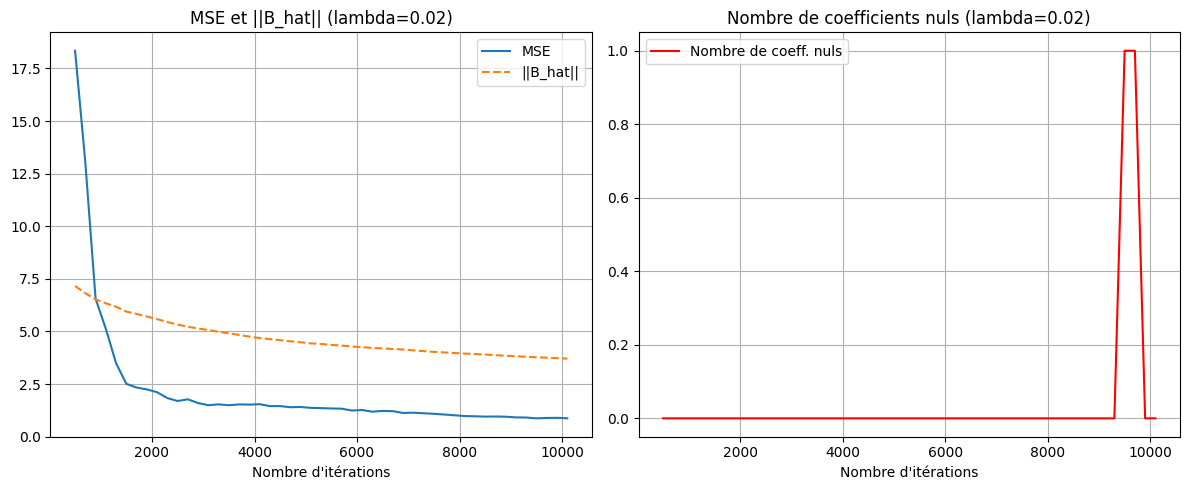

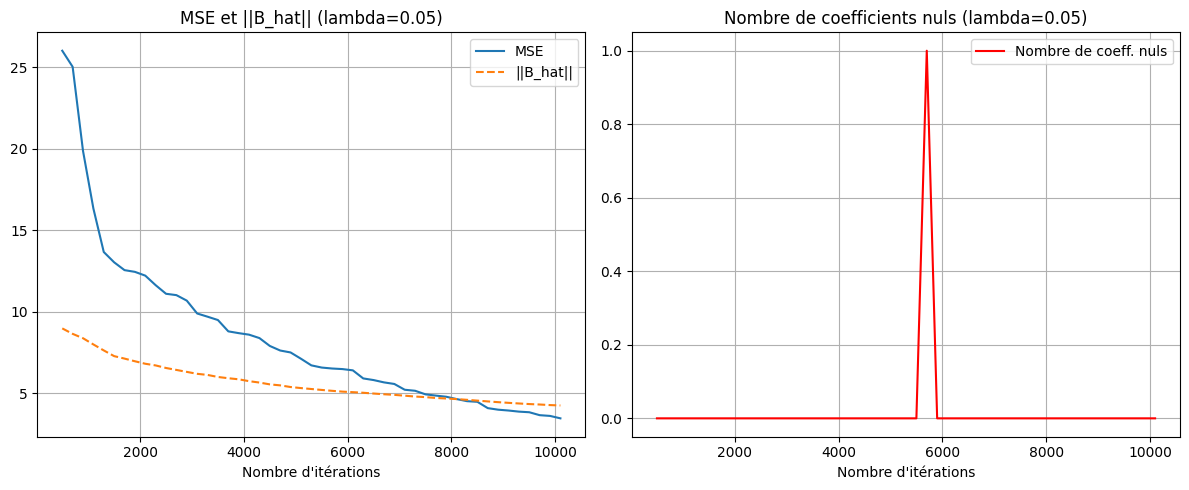

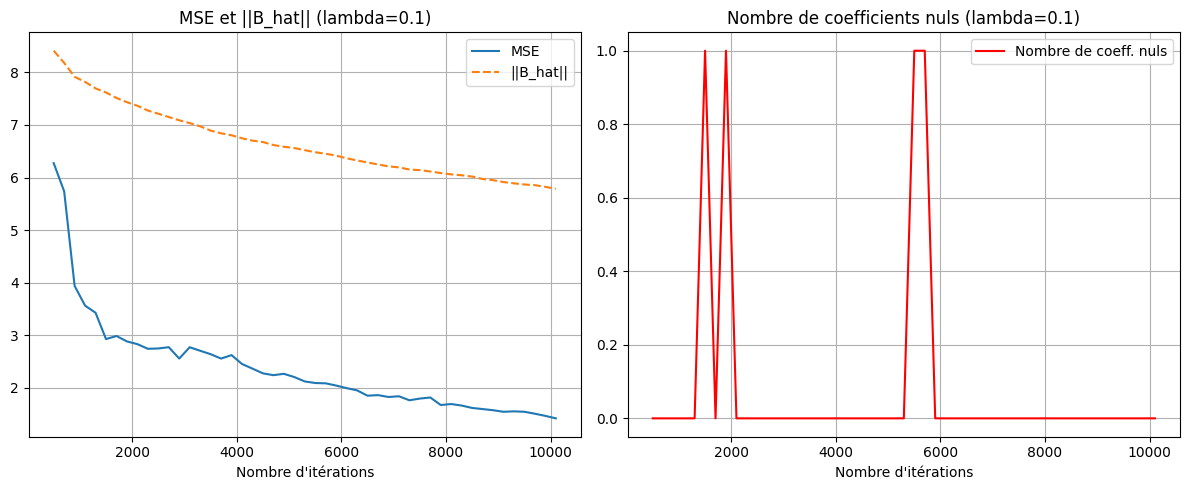

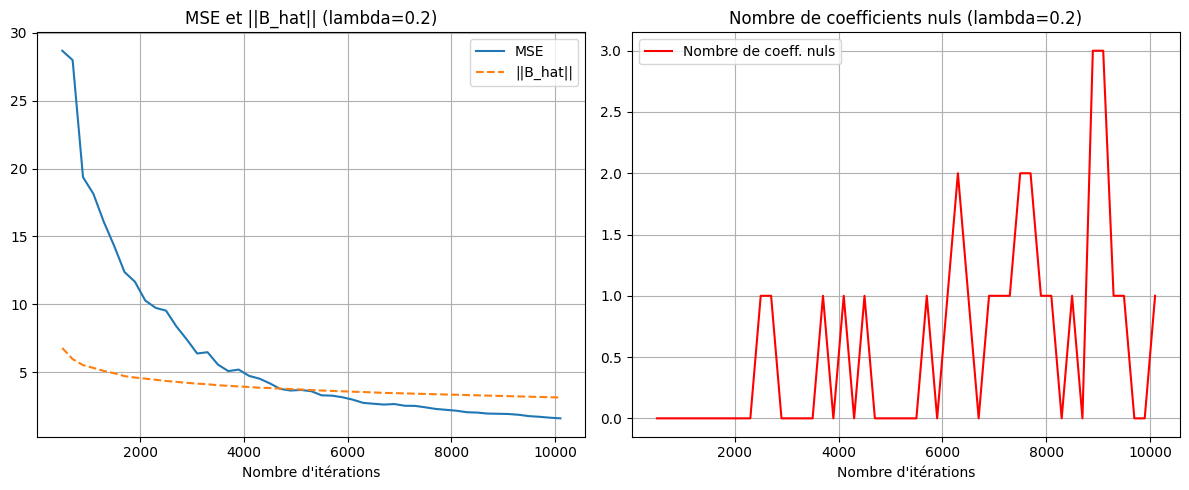

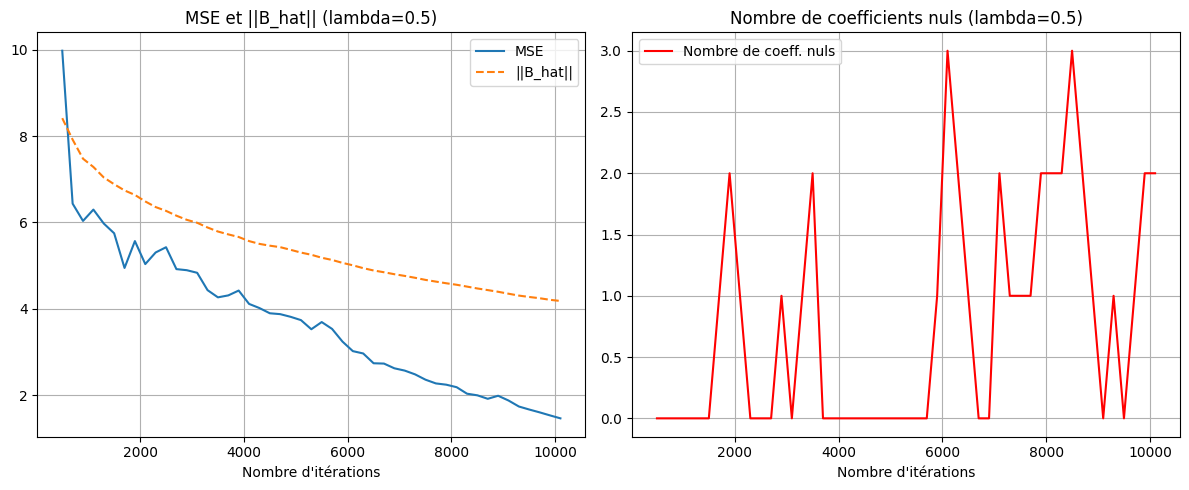

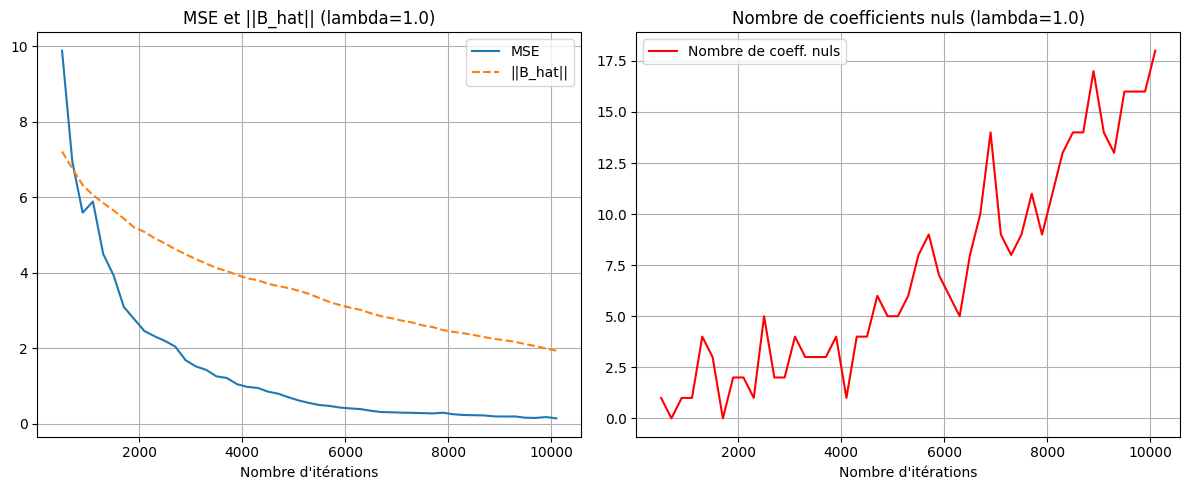

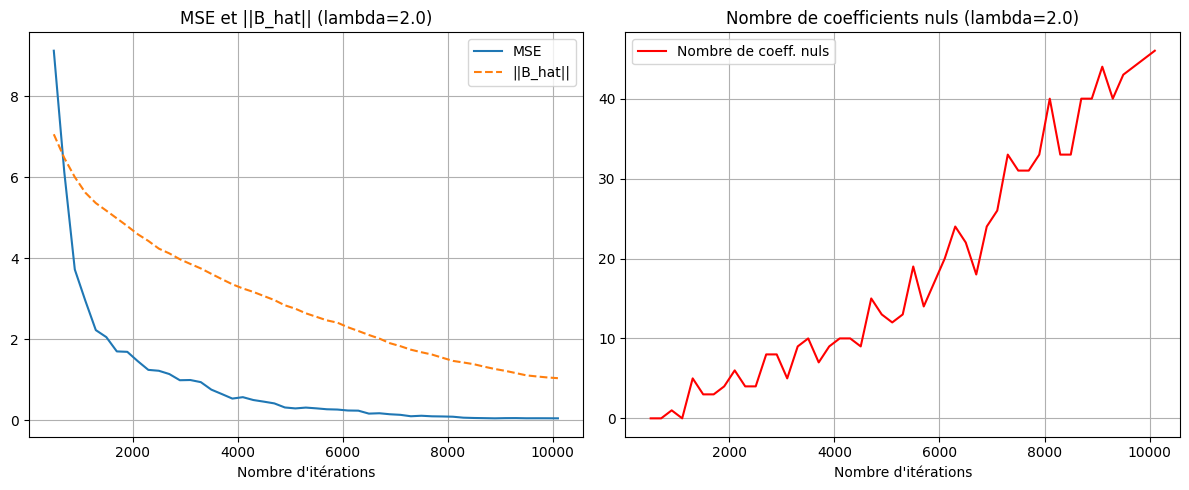

In [42]:
import matplotlib.pyplot as plt 

for lambda_val in liste_lambdas:
    results_lambda = [r for r in results if r[0] == lambda_val]

    # Extraction des itérations et des MSE
    x_iters = [r[1] for r in results_lambda]  # n_iter
    y_mses  = [r[3] for r in results_lambda]  # mse
    y_norm_beta_hat = [r[4] for r in results_lambda]  # Norme de beta_hat
    y_num_zero= [r[2] for r in results_lambda] 

    # Plot
    plt.figure(figsize=(12, 5))

    ax1 = plt.subplot(1, 2, 1)
    ax1.plot(x_iters, y_mses, linestyle='-', label="MSE")
    ax1.plot(x_iters, y_norm_beta_hat, linestyle='--', label="||B_hat||")
    ax1.set_title(f"MSE et ||B_hat|| (lambda={lambda_val})")
    ax1.set_xlabel("Nombre d'itérations")
    ax1.grid(True)
    ax1.legend()

    ax2 = plt.subplot(1, 2, 2)
    ax2.plot(x_iters, y_num_zero, linestyle='-', color='red', label="Nombre de coeff. nuls")
    ax2.set_title(f"Nombre de coefficients nuls (lambda={lambda_val})")
    ax2.set_xlabel("Nombre d'itérations")
    ax2.grid(True)
    ax2.legend()

    plt.tight_layout()
    plt.show()
    

#### Lasso Regression with Sklearn

In [32]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

<font color=darkred>
Create a np array with several values of the penalty parameter (called $\alpha$ in Python)
</font>

<font color=darkred>
Use the ``fit`` function of sklearn to fit a Lasso model with for each value of $\alpha$. 
    
Store the estimated parameter, the number of zeros in the estimated parameter and the MSE on the test set after each training.
</font>

In [33]:
sk_results = []
sk_liste_beta, sk_liste_num_zero, sk_liste_mse = [], [], []
liste_alpha =  [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0]

for alpha_val in liste_alpha :    
    # Create and fit the Lasso model
    lasso = Lasso(alpha=alpha_val, max_iter=100000)
    lasso.fit(X_train, Y_train)
    
    # Get the estimated parameters
    beta_hat = lasso.coef_
    sk_liste_beta.append(lasso.coef_)
    
    # Number of zero coefficients
    num_zero_coefs = np.sum(beta_hat == 0)
    sk_liste_num_zero.append(num_zero_coefs)
    
    # Mean Squared Error on the test set
    Y_pred = lasso.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    sk_liste_mse.append(mse)
    
    
    # Store the results
    sk_results.append((alpha_val, beta_hat, num_zero_coefs, mse))

# Display the results
#for alpha_val, beta_hat, num_zero_coefs, mse in results:
#    print(f"Pour alpha = {alpha_val}, il y a {num_zero_coefs} coeff de béta mis à 0, et le MSE= {mse}")


<font color=darkred>
Display the estimated parameters as a function of the penalty parameter.
</font>

In [35]:
nb_features = X_train.shape[1]

my_liste_beta = np.array(my_liste_beta)
my_liste_num_zero_coefs = np.array(my_liste_num_zero_coefs) 
my_liste_mse = np.array(my_liste_mse)

sk_liste_beta = np.array(sk_liste_beta) 
sk_liste_mse = np.array(sk_liste_mse)
sk_liste_num_zero = np.array(sk_liste_num_zero)

TypeError: list indices must be integers or slices, not tuple

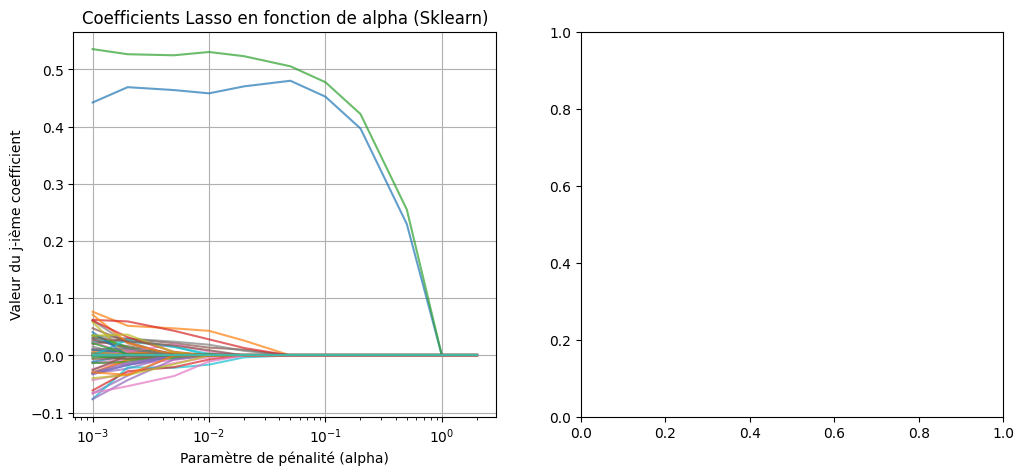

In [45]:
# Graphique coefficients en fonction de 

plt.figure(figsize=(12, 5))

ax1 = plt.subplot(1, 2, 1)
for j in range(nb_features):
    ax1.plot(liste_alpha, sk_liste_beta[:, j], alpha=0.7)

ax1.set_xlabel("Paramètre de pénalité (alpha)")
ax1.set_ylabel("Valeur du j-ième coefficient")
ax1.set_title("Coefficients Lasso en fonction de alpha (Sklearn)")
ax1.set_xscale("log")  # pour un affichage plus lisible quand alpha varie sur plusieurs ordres de grandeur
ax1.grid(True)

ax2 = plt.subplot(1, 2, 2)
for j in range(nb_features):
    ax2.plot(liste_lambdas, my_liste_beta[:, j], alpha=0.7)
ax2.set_xlabel("Paramètre de pénalité (alpha)")
ax2.set_ylabel("Valeur du j-ième coefficient")
ax2.set_title("Coefficients Lasso en fonction de alpha (Mon algo)")
ax2.set_xscale("log")  # pour un affichage plus lisible quand alpha varie sur plusieurs ordres de grandeur
ax2.grid(True)

plt.show()

<font color=darkred>
Display the number of zero coefficients of the estimated parameter as a function of the penalty parameter.
</font>

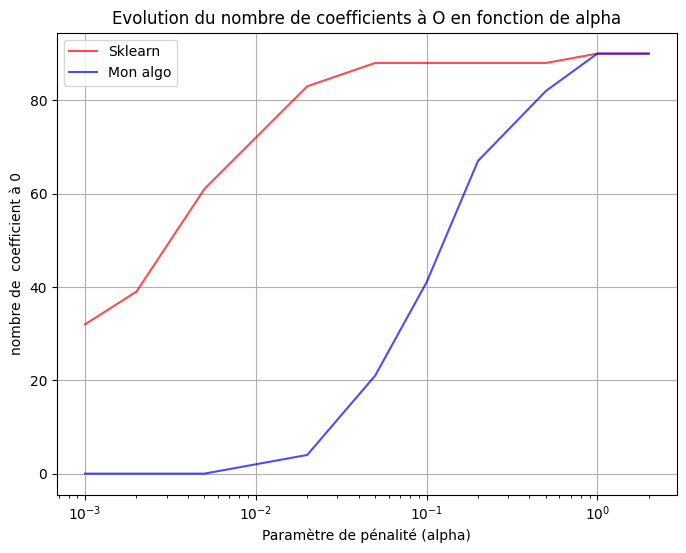

In [37]:
# Graphique nombre de zéro en fonction de alpha
plt.figure(figsize=(8, 6))

plt.plot(liste_alpha, sk_liste_num_zero, alpha=0.7, label ="Sklearn", color = "red")
plt.plot(liste_lambdas, my_liste_num_zero_coefs, alpha=0.7, label ="Mon algo", color = "blue")

plt.xlabel("Paramètre de pénalité (alpha)")
plt.ylabel("nombre de  coefficient à 0")
plt.title("Evolution du nombre de coefficients à O en fonction de alpha")
plt.xscale("log")
plt.grid(True)
plt.legend()
plt.show()

<font color=darkred>
Display the MSE on the test set as a function of the penalty parameter.
</font>

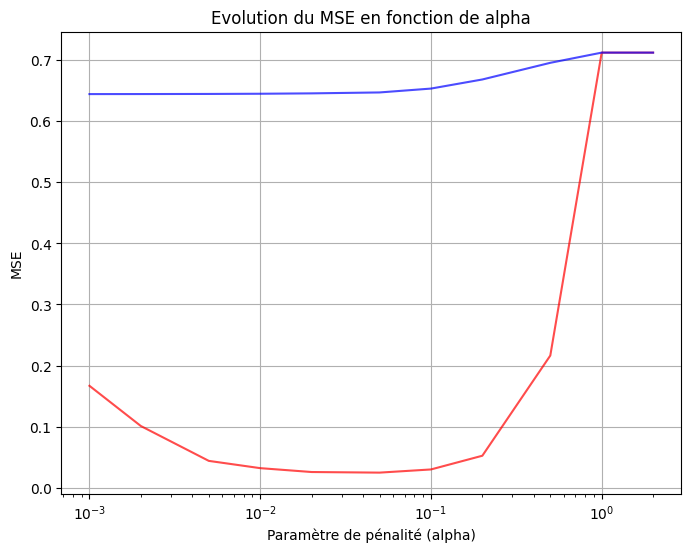

In [38]:
# Graphique MSE en fonction de alpha
plt.figure(figsize=(8, 6))

plt.plot(liste_alpha, sk_liste_mse, alpha=0.7, label ="Sklearn", color = "red")
plt.plot(liste_lambdas, my_liste_mse, alpha=0.7, label ="Mon algo", color = "blue")

plt.xlabel("Paramètre de pénalité (alpha)")
plt.ylabel("MSE")
plt.title("Evolution du MSE en fonction de alpha")
plt.xscale("log")
plt.grid(True)
plt.show()